### Importing Necessary Packages

In [28]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib import colors
from matplotlib.colors import ListedColormap
from IPython.display import HTML
import mpld3

### Importing the Dataset from a CSV file

In [8]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [13]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Distributions of each dataset feature:

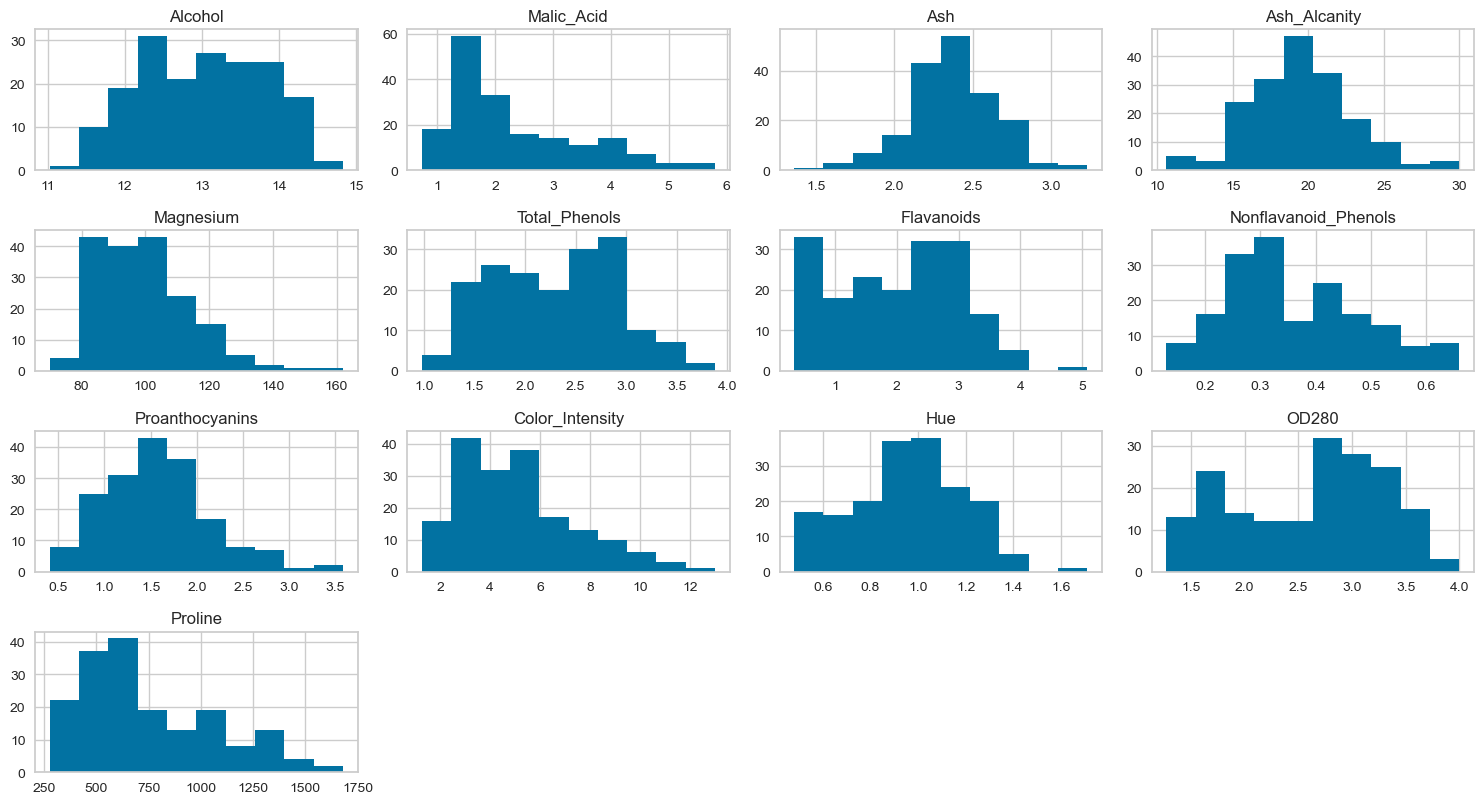

In [56]:
df.hist(layout = (5, 4), figsize = (15, 10), bins = 10)
plt.tight_layout()
plt.show()

#### Boxplots of each feature.
PCA is sensitive to outliers, so boxplots were made for each feature in order to identify any significant outliers. None were observed.

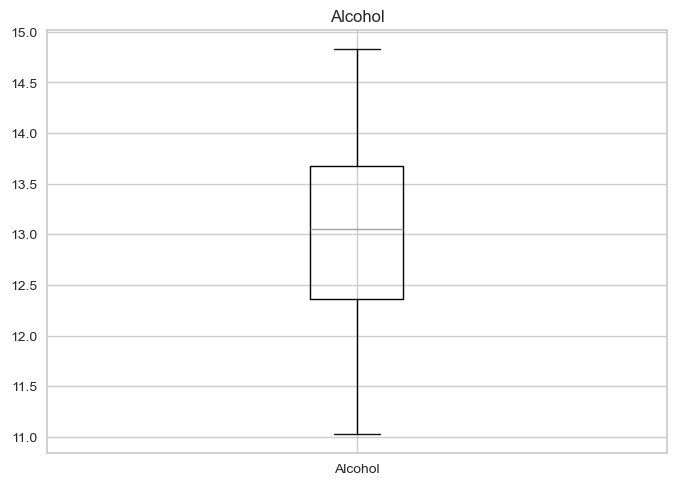

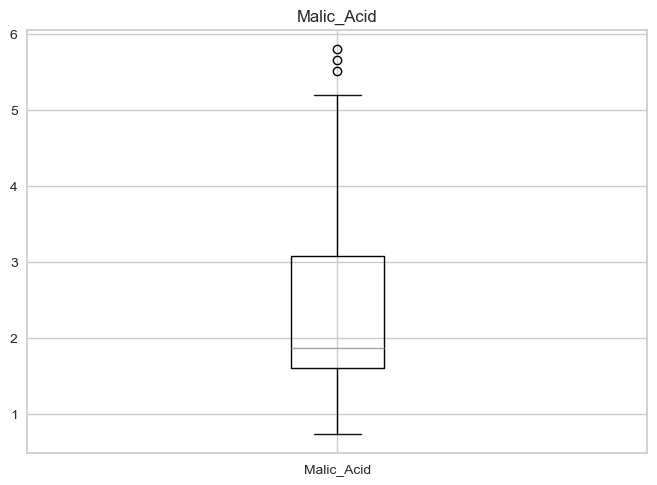

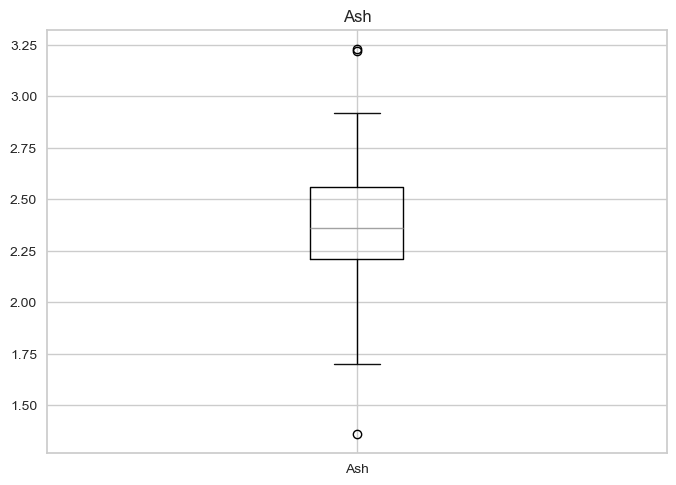

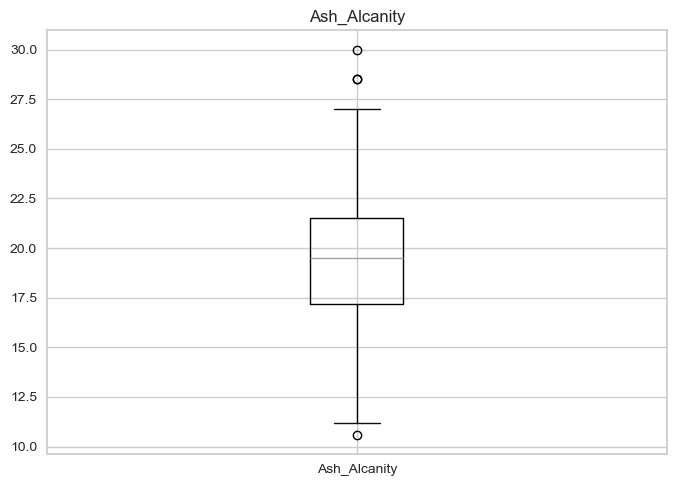

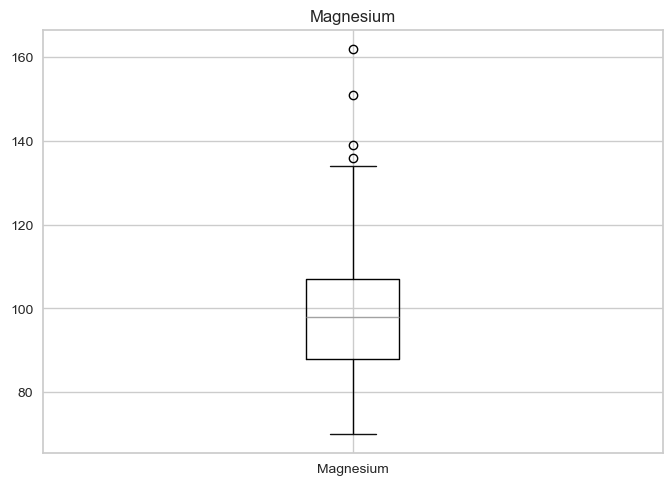

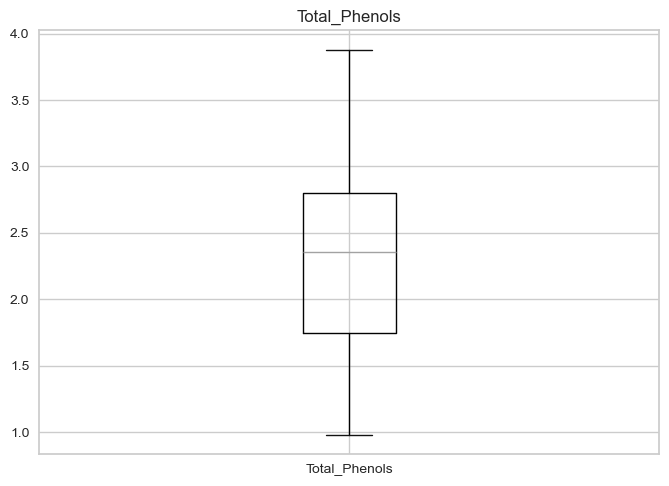

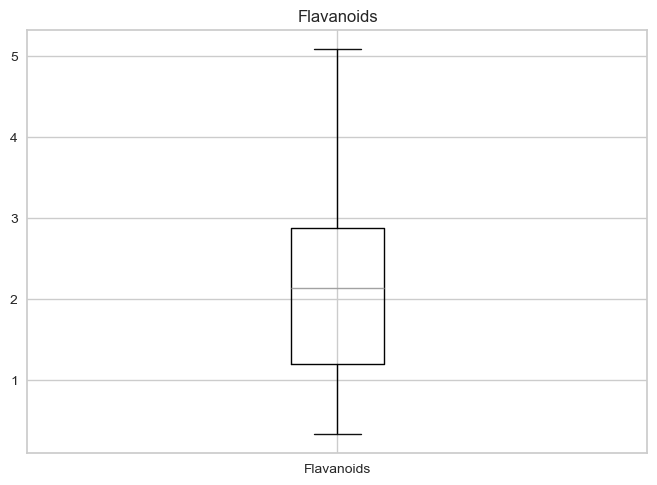

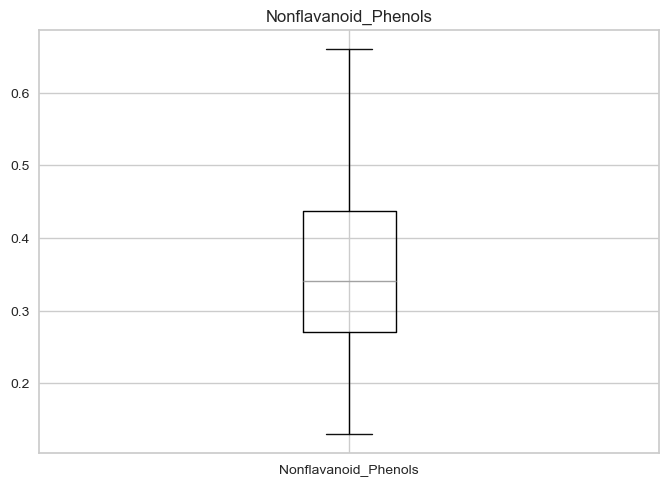

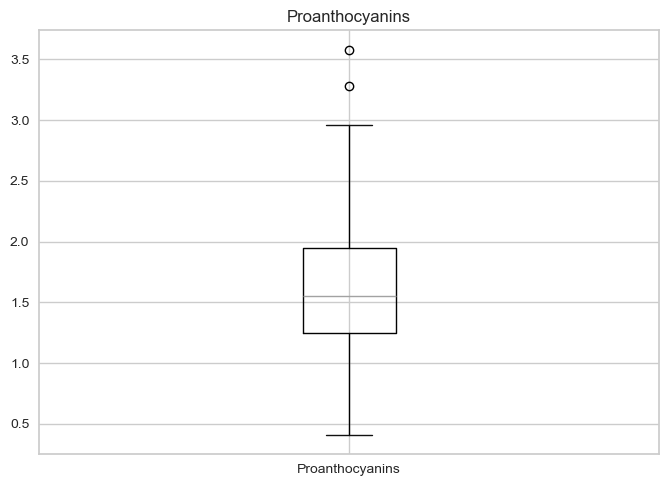

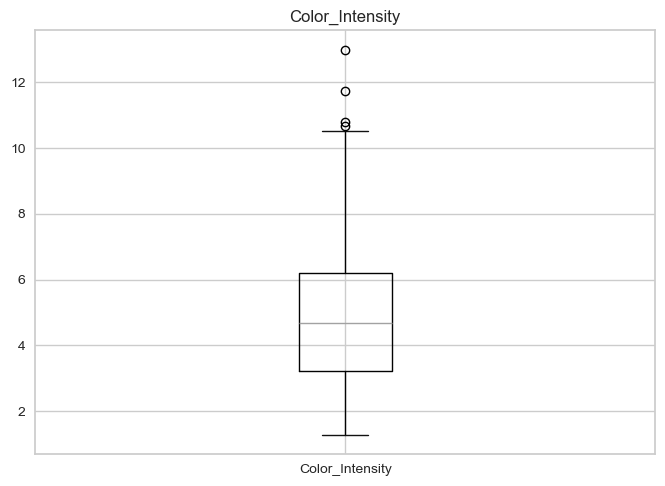

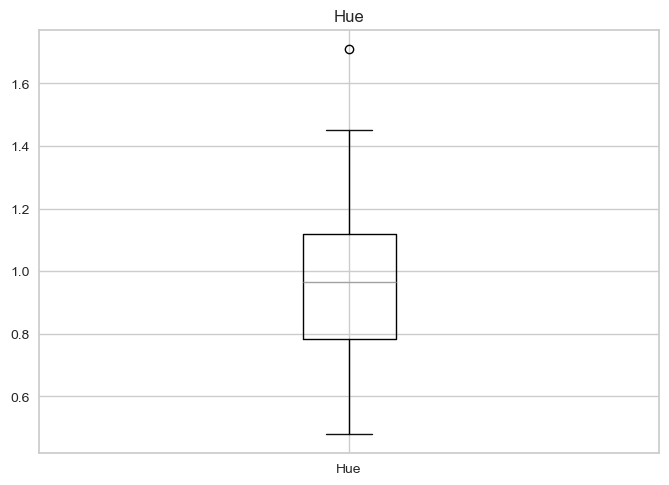

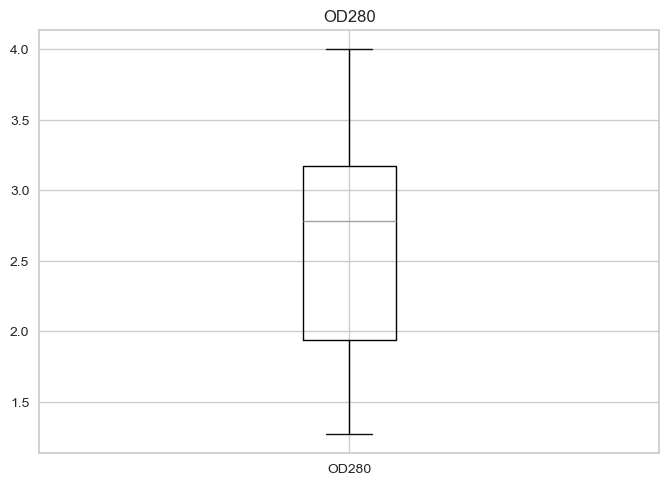

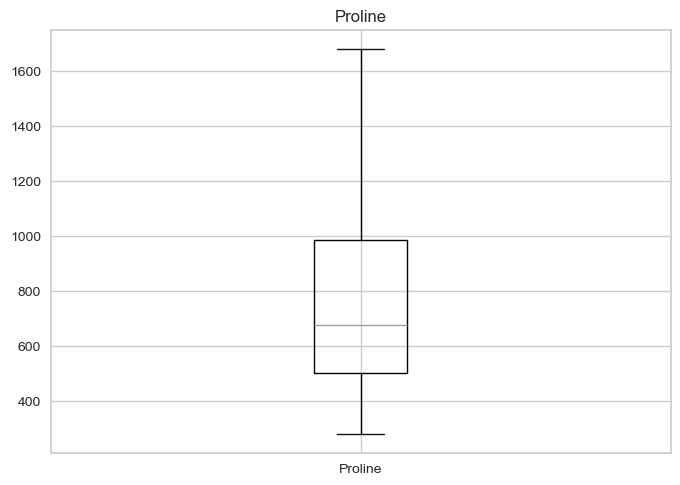

In [19]:
for col in df.columns:
    plt.figure()
    df.boxplot(column = col)
    plt.title(col)
plt.show()

In [21]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Pairplot to examine collinearity or correlation of features.

In [44]:
sns.pairplot(df)

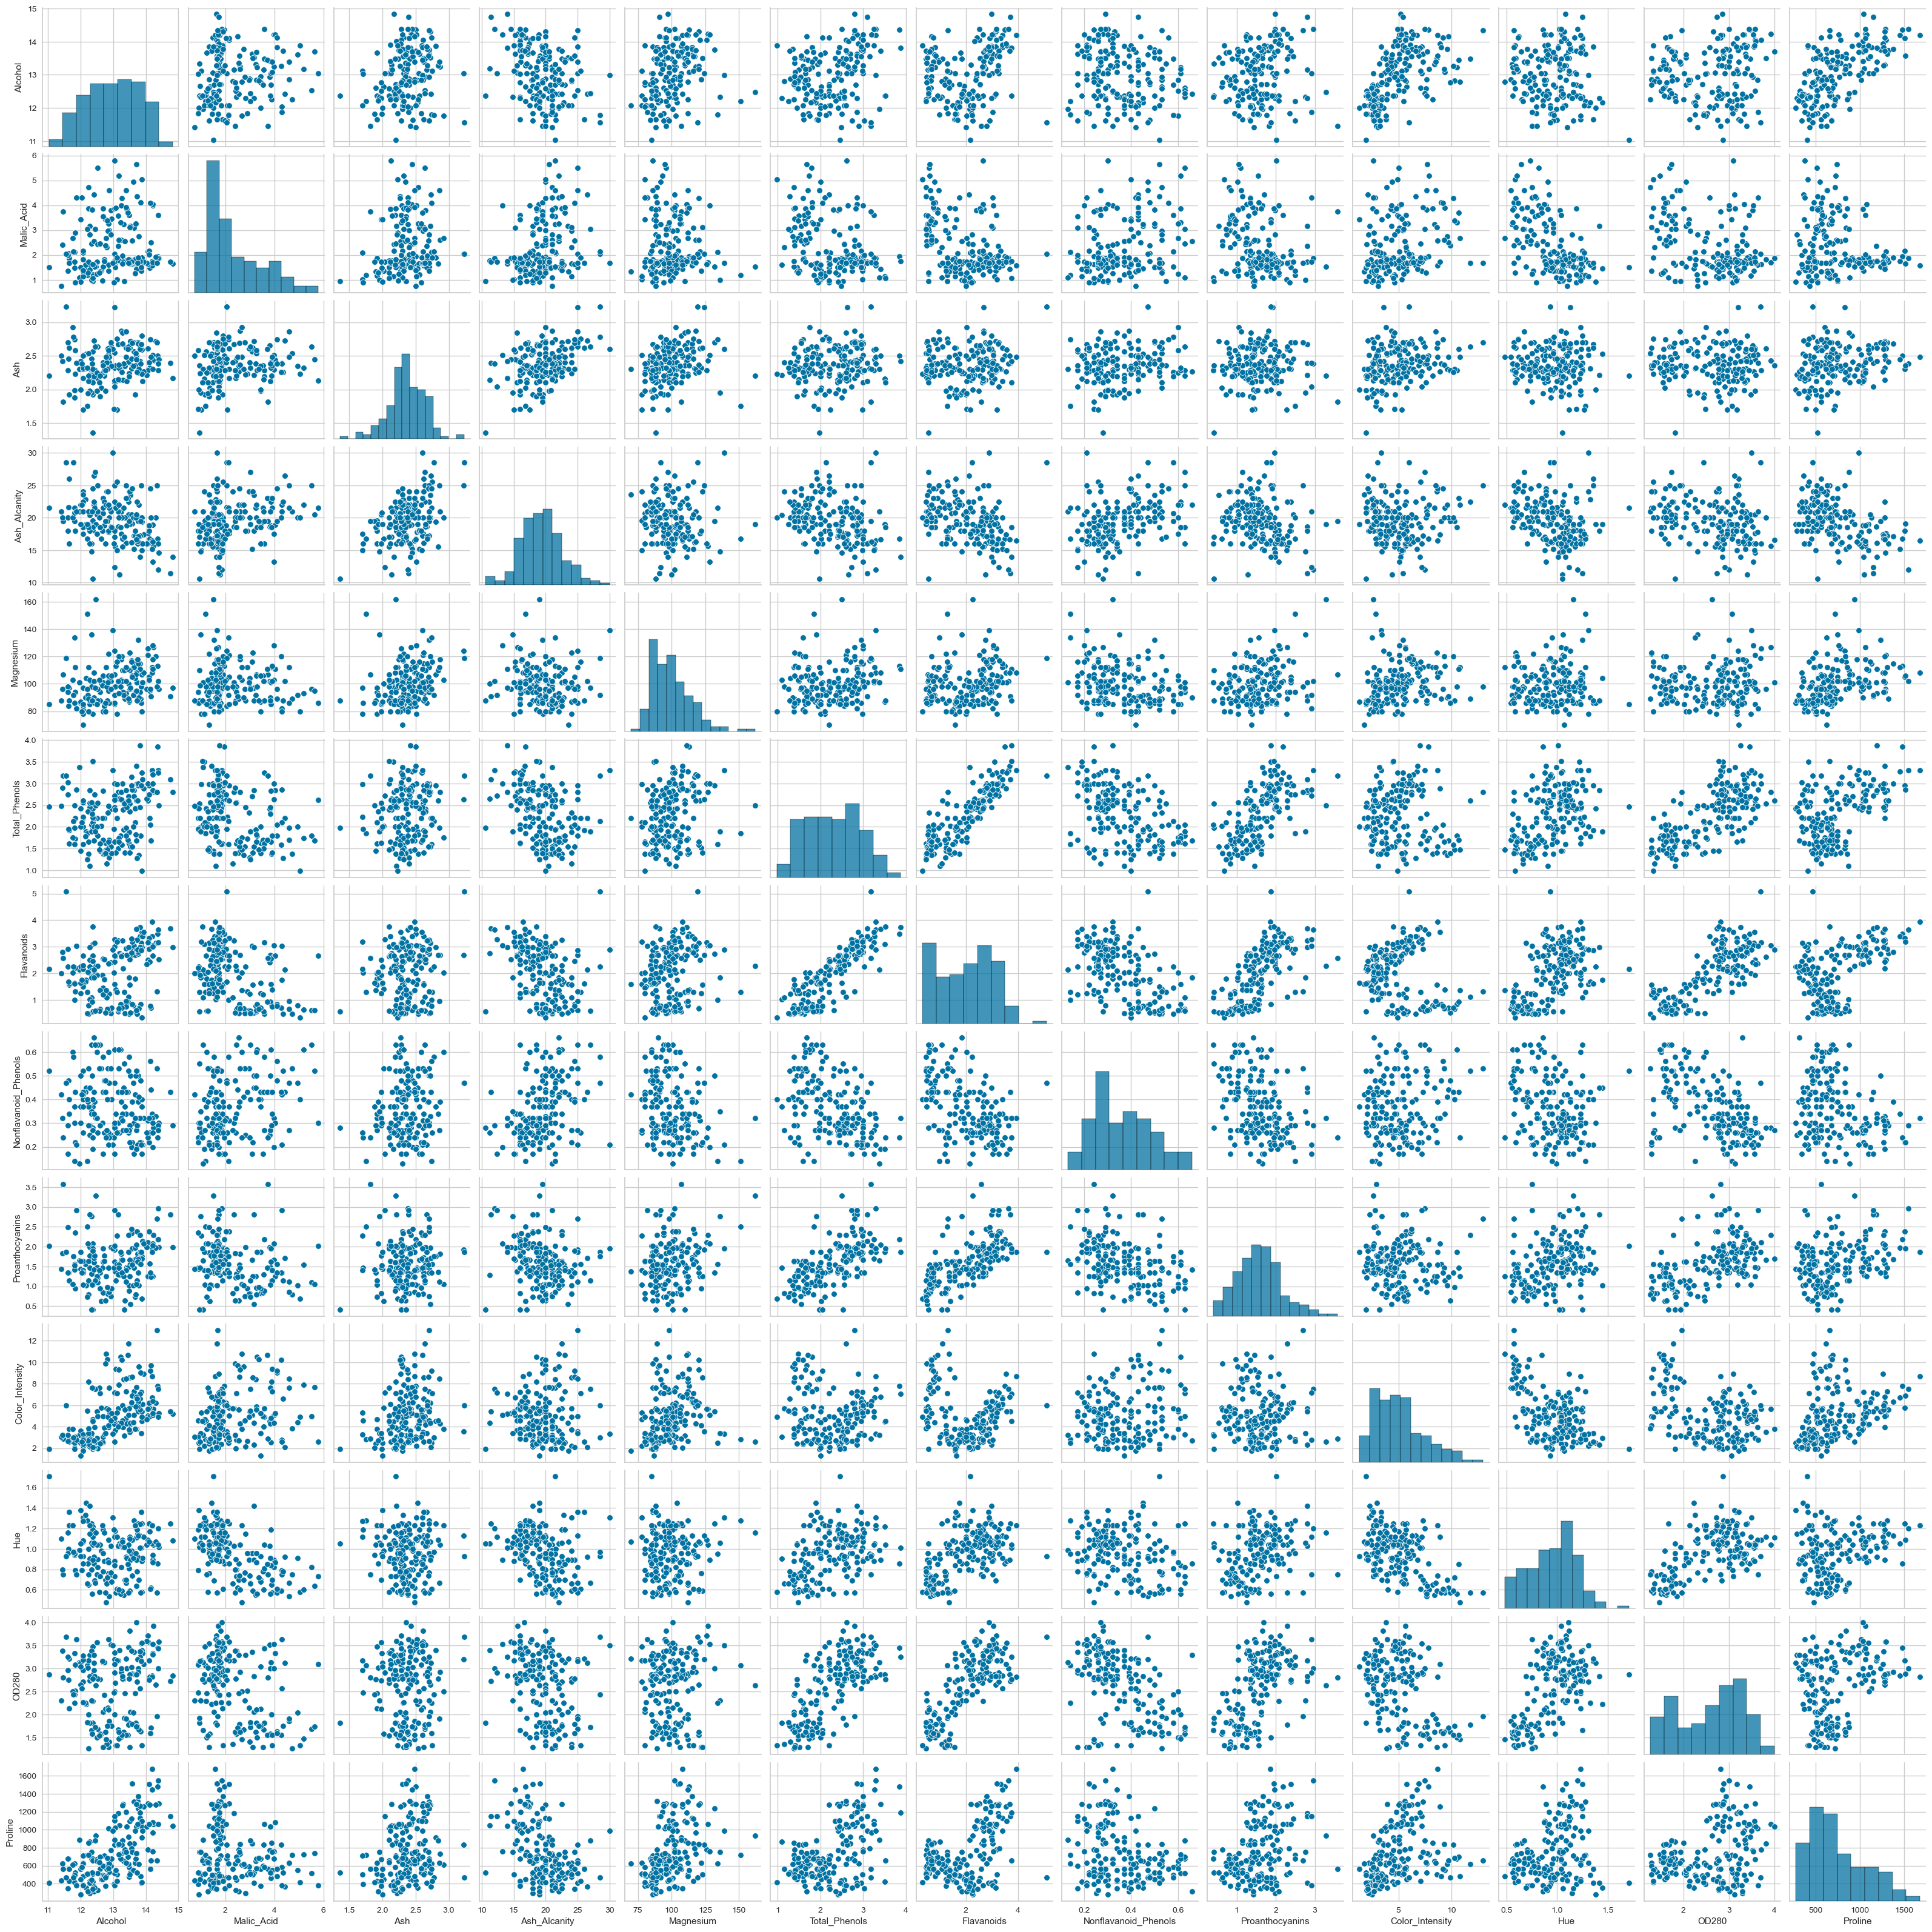

In [45]:
plt.show()

Features scaled to prepare for PCA

In [46]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns = df.columns)

In [48]:
scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### PCA
Principal component analysis reduces the dimensions of a dataset with a high number of features in order to better facilitate machine learning processes. It does so by calculating and maximizing the explained variance of linear combinations of features.

In [51]:
pca = PCA()
pca_test = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

Plotting a graph of the explained variance ratio of different numbers of PCA Components.

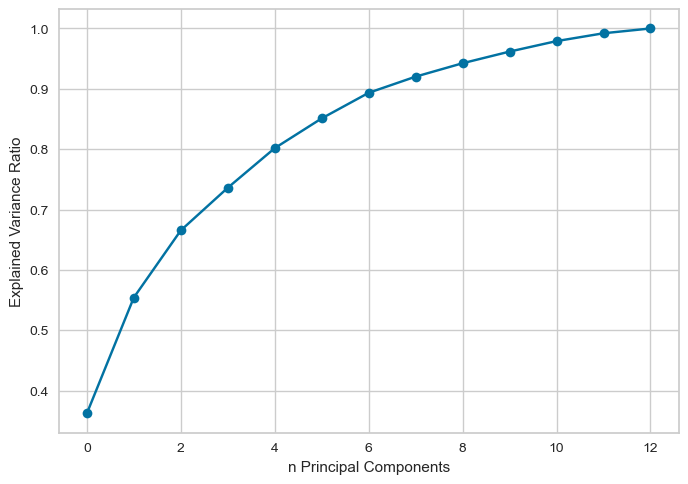

In [54]:
plt.plot(cumulative_variance_ratio, marker = 'o')
plt.xlabel('n Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

It appears that explained variance levels off with ~ 6 components. Our final model will use 6 components, but we will first run PCA with three principal components in order to better visualize the data.

In [57]:
pca_3 = PCA(n_components = 3)
pca_3.fit(scaled_df)
PCA3_df = pd.DataFrame(pca_3.transform(scaled_df), columns = ['Component 1', 'Component 2', 'Component 3'])
PCA3_df.head().T

,0,1,2,3,4
Component 1,3.316751,2.209465,2.516740,3.757066,1.008908
Component 2,1.443463,-0.333393,1.031151,2.756372,0.869831
Component 3,-0.165739,-2.026457,0.982819,-0.176192,2.026688


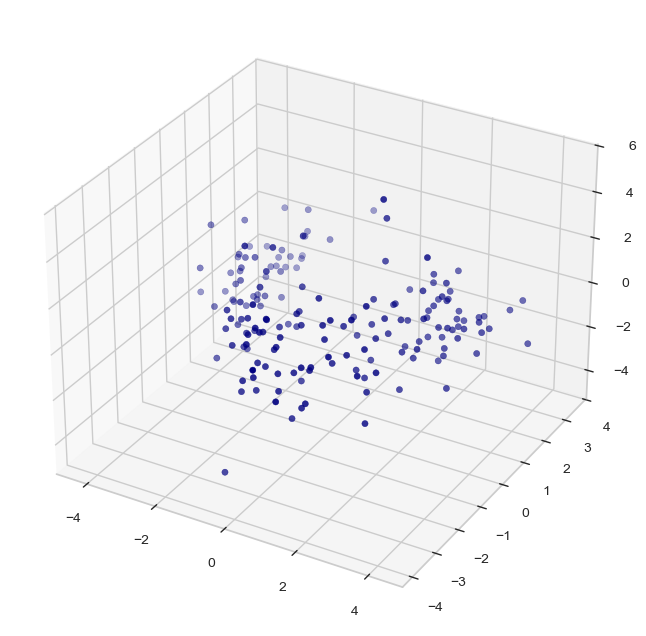

In [59]:
x = PCA3_df['Component 1']
y = PCA3_df['Component 2']
z = PCA3_df['Component 3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'navy', marker = 'o')
plt.show()

### PCA with 6 components

In [64]:
pca_6 = PCA(n_components = 6)
pca_6.fit(scaled_df)
PCA_df = pd.DataFrame(pca_6.transform(scaled_df), columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
PCA_df.head().T

,0,1,2,3,4
c1,3.316751,2.209465,2.516740,3.757066,1.008908
c2,1.443463,-0.333393,1.031151,2.756372,0.869831
c3,-0.165739,-2.026457,0.982819,-0.176192,2.026688
c4,-0.215631,-0.291358,0.724902,0.567983,-0.409766
c5,0.693043,-0.257655,-0.251033,-0.311842,0.298458
c6,0.223880,0.927120,-0.549276,-0.114431,0.406520


KMeans clustering with the PCA dataset

In [73]:
KMean = KMeans(n_clusters = 3)
KMean.fit(PCA_df)
yhat_kmeans = KMean.predict(PCA_df)

C:\Users\devan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Assigning clusters to rows in PCA and original datasets

In [95]:
PCA_df['KMeans_Clusters'] = yhat_kmeans
df['KMeans_Clusters'] = yhat_kmeans

In [77]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

Plotting PCA features with assigned clusters

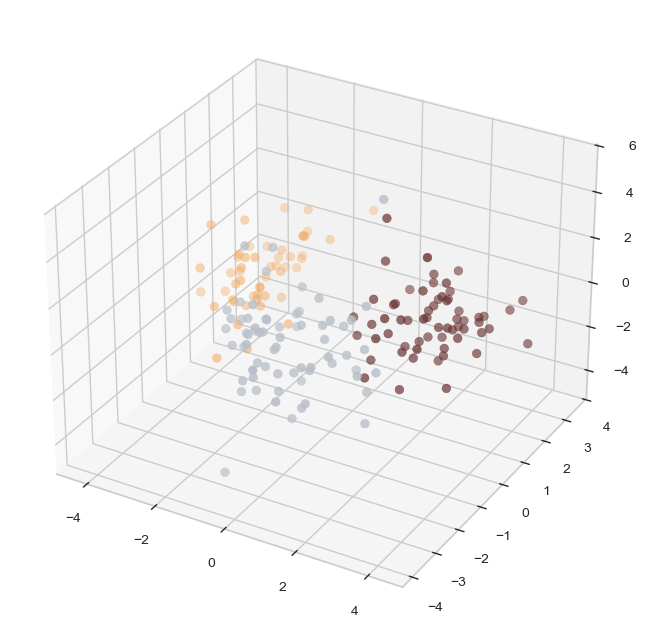

In [79]:
x = PCA_df['c1']
y = PCA_df['c2']
z = PCA_df['c3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 40, c = PCA_df['KMeans_Clusters'], marker = 'o', cmap = cmap)
plt.show()

Agglomerative Clustering method on PCA dataset

In [81]:
AC = AgglomerativeClustering(n_clusters = 3)
yhat_AC = AC.fit_predict(PCA_df)

Assigning clusters to dataframes and plotting cluster assignments again

In [83]:
PCA_df['AC_Clusters'] = yhat_AC
df['AC_Clusters'] = yhat_AC

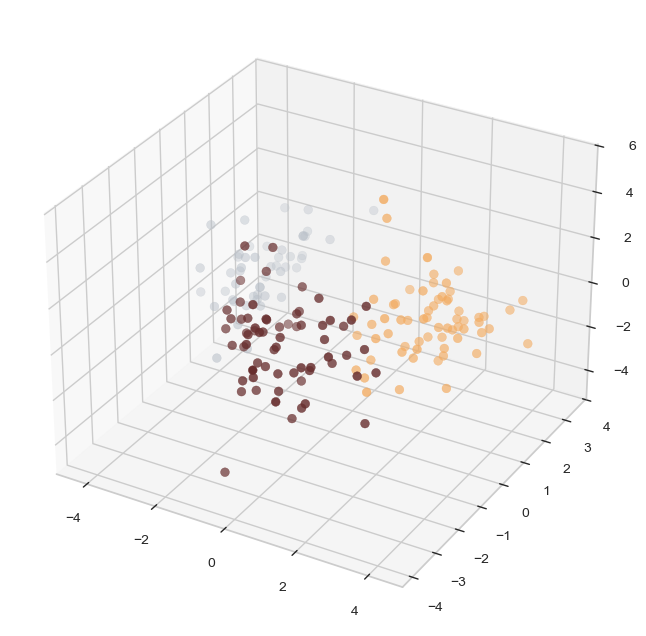

In [85]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 40, c = PCA_df['AC_Clusters'], marker = 'o', cmap = cmap)
plt.show()

### Evaluation of Model Performance

Calculating accuracy score between the two cluster assignments. As this is an unsupervised project with no validation data, we cannot know exactly how the models performed. Here, I am aiming to see if there are significant differences between the custer assignments. As the two methods assigned different numbers of each of the 3 clusters, we know that they assigned each data point to the same clusters.

In [87]:
accuracy_score(df['KMeans_Clusters'], df['AC_Clusters'])

0.0

Graphing the distribution of datapoints in the three clusters. There appears to be a relatively even distribution among the three clusters.

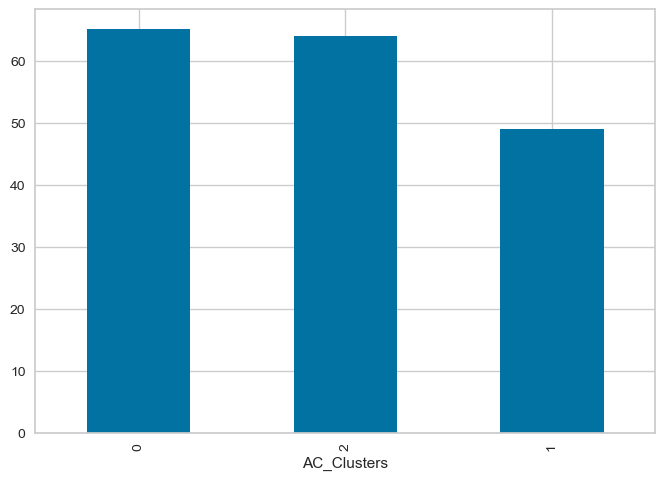

In [89]:
counts = df['AC_Clusters'].value_counts()
counts.plot(kind = 'bar')
plt.show()

#### Below, we attempt to explore the characteristics of the different clusters and assign qualitative descriptions to each one.
The scatterplot below shows that cluster 2 tents to be higher in alcohol with more phenols than clusters 0 or 1. Cluster 0 appears to have the second highest average alcohol concentration, while still having more phenols than cluster 1.

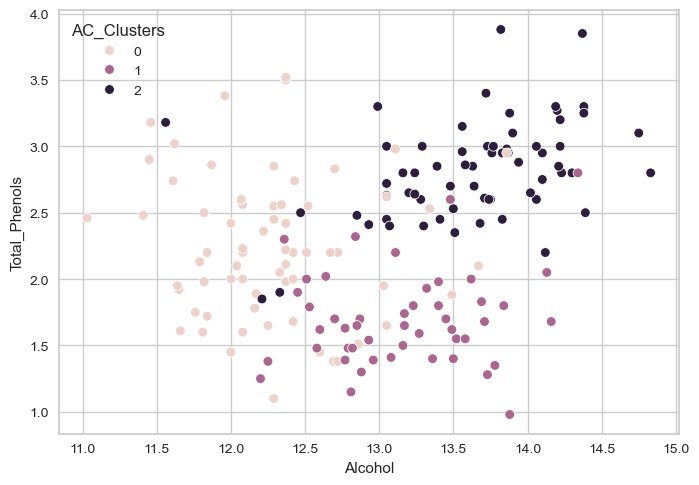

In [128]:
pl = sns.scatterplot(data = df, x = df['Alcohol'], y = df['Total_Phenols'], hue = df['AC_Clusters'])
plt.show()

Cluster 1 appears to have a ligher hue with higher color intensity. Clusters 0 and 2 appear to have a darker hue with less intense colors.

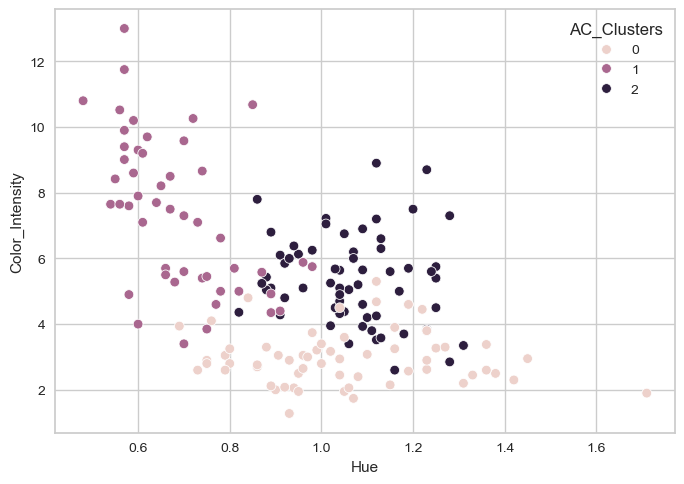

In [130]:
pl2 = sns.scatterplot(data = df, x = df['Hue'], y = df['Color_Intensity'], hue = df['AC_Clusters'])
plt.show()

The below graphs show the distribution of one specific attribute. The above findings that cluster 2 has the highst alcohol content while cluster 0 has the lowest is supported with the below box plots. 

C:\Users\devan\AppData\Local\Temp\ipykernel_37364\1780646686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Alcohol'],palette = 'muted')


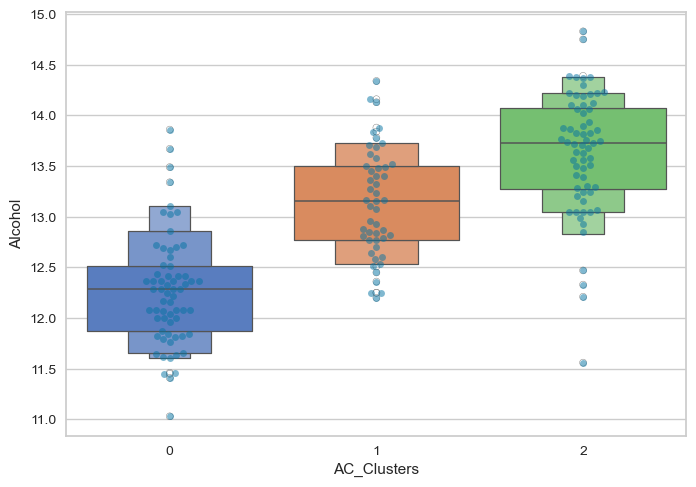

In [158]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Alcohol'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Alcohol'],palette = 'muted')
plt.show()

Here, we can see that there are stark differences in Flavanoids between wines. A quick internet search shows that flavonoids contribute to the bitterness of wine, so wines in cluster 2 are likely more bitter than the others.

C:\Users\devan\AppData\Local\Temp\ipykernel_37364\2509502387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Flavanoids'], palette = 'muted')


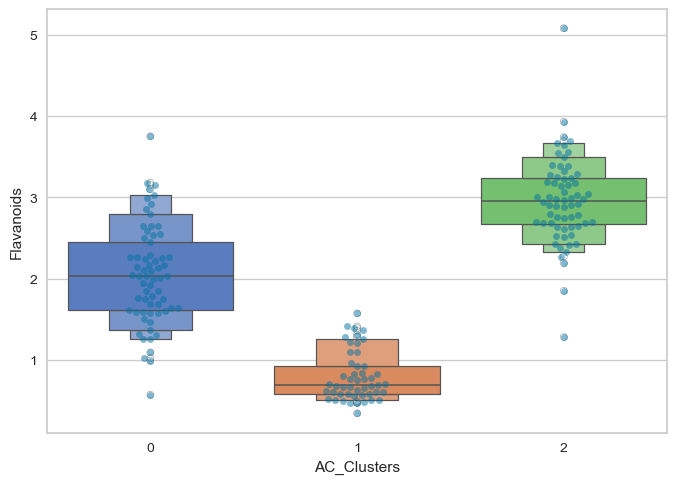

In [180]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Flavanoids'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Flavanoids'], palette = 'muted')
plt.show()

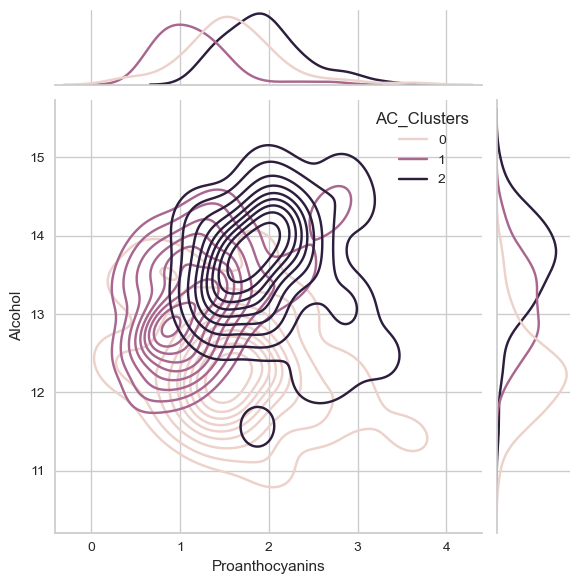

In [197]:
sns.jointplot(x = df['Proanthocyanins'], y = df['Alcohol'], hue = df['AC_Clusters'], kind = 'kde')
plt.show()

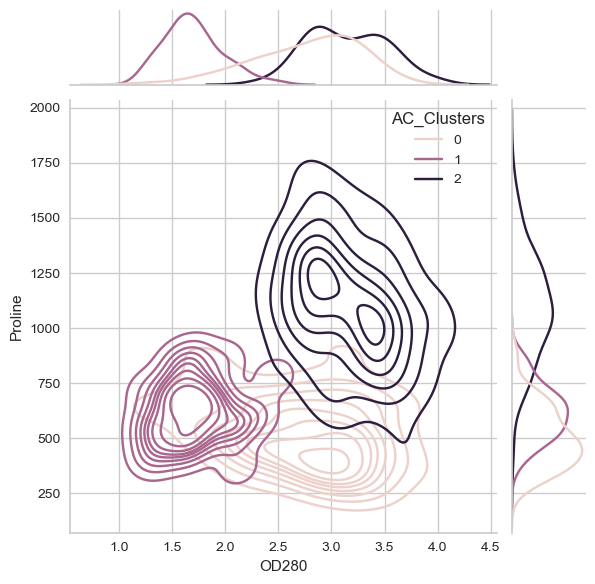

In [192]:
sns.jointplot(x = df['OD280'], y = df['Proline'], hue = df['AC_Clusters'], kind = 'kde')
plt.show()

### Conclusion
Cluster 0:
- Lower in Alcohol
- Moderate amounts of Flavonoids
- Low in Proline
- High in OD280
- Wide range of Hues
- Low color intensity

It seems that wines in cluster 0 are milder than the other two. They tend to have a lower alcohol content and moderate flavonoids, both of which contribute to bitterness. Proline can increase the viscosity of wine, so these are likely thinner, lighter wines.

Cluster 1:
- Moderate Alcohol levels
- Low Flavonoids
- Low in Proline
- Low in OD280
- Lighter Hues
- More color intensity

Wines in cluster 1 appear to be a darker varietal than that of cluster 0. They are stronger in alcohol but lower in flavonoids, likely leading to a more bitter taste. These wines appear to be stronger, but less bitter than other varietals in the dataset.

Cluster 2:
- Higher Alcohol content
- Most Flavonoids
- Higher in Proline
- High OD280 value
- Darker Hue
- Moderate Color Intensity

Wines in cluster 2 appear to be more full-bodied than others in the dataset. They are strong in alcohol and high in flavonoids, making them a bitter selection. They also have high proline, darker hues and a relatively intense color. These appear to be a stronger varietal than the others.
  

In [203]:
df_val = pd.read_csv('wine.csv')
df_val.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


I found the source dataset for this project in the UCI Machine Learning Repository. It contained labels for each of the wine categories, but was one row shorter than the dataset I had been working with. I unscientifically removed the last value in the original data frame and computed the accuracy score of my clusters, which was approximately 96%.

In [251]:
accuracy_score((df['KMeans_Clusters'] + 1).iloc[:-1], df_val['1'])

0.96045197740113